In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
lo = LeaveOneOut()

In [3]:
data = pd.read_csv('data_tc.csv')

In [4]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']
y = data['ND FCC_A1#2']

<AxesSubplot: >

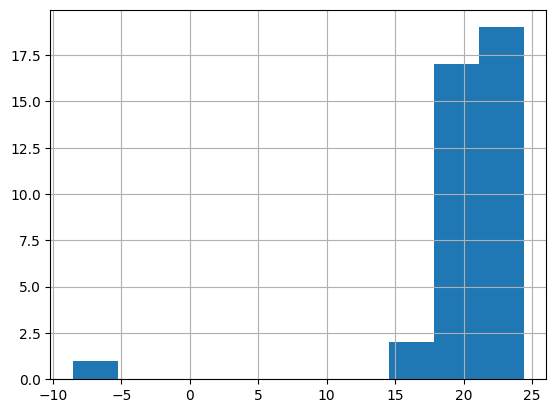

In [5]:
data['ND FCC_A1#2'].hist()

In [6]:
X = np.array(data[columns][y>0])
y = np.array(y[y>0])

# Lasso

In [7]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 38 folds for each of 100 candidates, totalling 3800 fits
[CV 1/38; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/38; 1/100] END ......lasso__alpha=1e-05;, score=-20.479 total time=   0.0s
[CV 2/38; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/38; 1/100] END .......lasso__alpha=1e-05;, score=-9.858 total time=   0.0s
[CV 3/38; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/38; 1/100] END .......lasso__alpha=1e-05;, score=-0.865 total time=   0.0s
[CV 4/38; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/38; 1/100] END .......lasso__alpha=1e-05;, score=-0.217 total time=   0.0s
[CV 5/38; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/38; 1/100] END .......lasso__alpha=1e-05;, score=-0.967 total time=   0.0s
[CV 6/38; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/38; 1/100] END .......lasso__alpha=1e-

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.522e+00, tolerance: 1.194e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+00, tolerance: 1.233e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 14/38; 3/100] END lasso__alpha=0.20203000000000002;, score=-8.003 total time=   0.0s
[CV 15/38; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 15/38; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.612 total time=   0.0s
[CV 16/38; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 16/38; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.035 total time=   0.0s
[CV 17/38; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 17/38; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.405 total time=   0.0s
[CV 18/38; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 18/38; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.828 total time=   0.0s
[CV 19/38; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 19/38; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.018 total time=   0.0s
[CV 20/38; 3/100] START lasso__alpha=0.20203000000000002.....

[CV 21/38; 6/100] END ....lasso__alpha=0.50506;, score=-1.467 total time=   0.0s
[CV 22/38; 6/100] START lasso__alpha=0.50506....................................
[CV 22/38; 6/100] END ....lasso__alpha=0.50506;, score=-2.775 total time=   0.0s
[CV 23/38; 6/100] START lasso__alpha=0.50506....................................
[CV 23/38; 6/100] END ....lasso__alpha=0.50506;, score=-6.885 total time=   0.0s
[CV 24/38; 6/100] START lasso__alpha=0.50506....................................
[CV 24/38; 6/100] END ...lasso__alpha=0.50506;, score=-46.434 total time=   0.0s
[CV 25/38; 6/100] START lasso__alpha=0.50506....................................
[CV 25/38; 6/100] END ...lasso__alpha=0.50506;, score=-26.611 total time=   0.0s
[CV 26/38; 6/100] START lasso__alpha=0.50506....................................
[CV 26/38; 6/100] END ....lasso__alpha=0.50506;, score=-0.239 total time=   0.0s
[CV 27/38; 6/100] START lasso__alpha=0.50506....................................
[CV 27/38; 6/100] END ....la

[CV 5/38; 9/100] END .....lasso__alpha=0.80809;, score=-0.041 total time=   0.0s
[CV 6/38; 9/100] START lasso__alpha=0.80809.....................................
[CV 6/38; 9/100] END .....lasso__alpha=0.80809;, score=-0.000 total time=   0.0s
[CV 7/38; 9/100] START lasso__alpha=0.80809.....................................
[CV 7/38; 9/100] END .....lasso__alpha=0.80809;, score=-0.804 total time=   0.0s
[CV 8/38; 9/100] START lasso__alpha=0.80809.....................................
[CV 8/38; 9/100] END .....lasso__alpha=0.80809;, score=-0.124 total time=   0.0s
[CV 9/38; 9/100] START lasso__alpha=0.80809.....................................
[CV 9/38; 9/100] END .....lasso__alpha=0.80809;, score=-1.749 total time=   0.0s
[CV 10/38; 9/100] START lasso__alpha=0.80809....................................
[CV 10/38; 9/100] END ....lasso__alpha=0.80809;, score=-0.000 total time=   0.0s
[CV 11/38; 9/100] START lasso__alpha=0.80809....................................
[CV 11/38; 9/100] END ....la

[CV 26/38; 11/100] END ...lasso__alpha=1.01011;, score=-1.439 total time=   0.0s
[CV 27/38; 11/100] START lasso__alpha=1.01011...................................
[CV 27/38; 11/100] END ...lasso__alpha=1.01011;, score=-4.992 total time=   0.0s
[CV 28/38; 11/100] START lasso__alpha=1.01011...................................
[CV 28/38; 11/100] END ...lasso__alpha=1.01011;, score=-3.045 total time=   0.0s
[CV 29/38; 11/100] START lasso__alpha=1.01011...................................
[CV 29/38; 11/100] END ...lasso__alpha=1.01011;, score=-2.581 total time=   0.0s
[CV 30/38; 11/100] START lasso__alpha=1.01011...................................
[CV 30/38; 11/100] END ...lasso__alpha=1.01011;, score=-2.984 total time=   0.0s
[CV 31/38; 11/100] START lasso__alpha=1.01011...................................
[CV 31/38; 11/100] END ...lasso__alpha=1.01011;, score=-4.929 total time=   0.0s
[CV 32/38; 11/100] START lasso__alpha=1.01011...................................
[CV 32/38; 11/100] END ...la

[CV 15/38; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.486 total time=   0.0s
[CV 16/38; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 16/38; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.269 total time=   0.0s
[CV 17/38; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 17/38; 14/100] END lasso__alpha=1.3131400000000002;, score=-4.791 total time=   0.0s
[CV 18/38; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 18/38; 14/100] END lasso__alpha=1.3131400000000002;, score=-0.030 total time=   0.0s
[CV 19/38; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 19/38; 14/100] END lasso__alpha=1.3131400000000002;, score=-1.621 total time=   0.0s
[CV 20/38; 14/100] START lasso__alpha=1.3131400000000002........................
[CV 20/38; 14/100] END lasso__alpha=1.3131400000000002;, score=-2.002 total time=   0.0s
[CV 21/38; 14/100] START lasso__alpha=1.3131400000000002.....

[CV 31/38; 16/100] END ...lasso__alpha=1.51516;, score=-4.929 total time=   0.0s
[CV 32/38; 16/100] START lasso__alpha=1.51516...................................
[CV 32/38; 16/100] END ...lasso__alpha=1.51516;, score=-1.880 total time=   0.0s
[CV 33/38; 16/100] START lasso__alpha=1.51516...................................
[CV 33/38; 16/100] END ...lasso__alpha=1.51516;, score=-0.269 total time=   0.0s
[CV 34/38; 16/100] START lasso__alpha=1.51516...................................
[CV 34/38; 16/100] END ...lasso__alpha=1.51516;, score=-0.030 total time=   0.0s
[CV 35/38; 16/100] START lasso__alpha=1.51516...................................
[CV 35/38; 16/100] END ...lasso__alpha=1.51516;, score=-1.621 total time=   0.0s
[CV 36/38; 16/100] START lasso__alpha=1.51516...................................
[CV 36/38; 16/100] END ...lasso__alpha=1.51516;, score=-2.414 total time=   0.0s
[CV 37/38; 16/100] START lasso__alpha=1.51516...................................
[CV 37/38; 16/100] END ...la

[CV 9/38; 19/100] END lasso__alpha=1.8181900000000002;, score=-1.778 total time=   0.0s
[CV 10/38; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 10/38; 19/100] END lasso__alpha=1.8181900000000002;, score=-0.001 total time=   0.0s
[CV 11/38; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 11/38; 19/100] END lasso__alpha=1.8181900000000002;, score=-0.558 total time=   0.0s
[CV 12/38; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 12/38; 19/100] END lasso__alpha=1.8181900000000002;, score=-1.441 total time=   0.0s
[CV 13/38; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 13/38; 19/100] END lasso__alpha=1.8181900000000002;, score=-1.880 total time=   0.0s
[CV 14/38; 19/100] START lasso__alpha=1.8181900000000002........................
[CV 14/38; 19/100] END lasso__alpha=1.8181900000000002;, score=-2.449 total time=   0.0s
[CV 15/38; 19/100] START lasso__alpha=1.8181900000000002......

[CV 19/38; 21/100] END ...lasso__alpha=2.02021;, score=-1.621 total time=   0.0s
[CV 20/38; 21/100] START lasso__alpha=2.02021...................................
[CV 20/38; 21/100] END ...lasso__alpha=2.02021;, score=-2.002 total time=   0.0s
[CV 21/38; 21/100] START lasso__alpha=2.02021...................................
[CV 21/38; 21/100] END ...lasso__alpha=2.02021;, score=-2.414 total time=   0.0s
[CV 22/38; 21/100] START lasso__alpha=2.02021...................................
[CV 22/38; 21/100] END ...lasso__alpha=2.02021;, score=-3.929 total time=   0.0s
[CV 23/38; 21/100] START lasso__alpha=2.02021...................................
[CV 23/38; 21/100] END ...lasso__alpha=2.02021;, score=-0.046 total time=   0.0s
[CV 24/38; 21/100] START lasso__alpha=2.02021...................................
[CV 24/38; 21/100] END ..lasso__alpha=2.02021;, score=-37.114 total time=   0.0s
[CV 25/38; 21/100] START lasso__alpha=2.02021...................................
[CV 25/38; 21/100] END ..las

[CV 31/38; 23/100] END ...lasso__alpha=2.22223;, score=-4.929 total time=   0.0s
[CV 32/38; 23/100] START lasso__alpha=2.22223...................................
[CV 32/38; 23/100] END ...lasso__alpha=2.22223;, score=-1.880 total time=   0.0s
[CV 33/38; 23/100] START lasso__alpha=2.22223...................................
[CV 33/38; 23/100] END ...lasso__alpha=2.22223;, score=-0.269 total time=   0.0s
[CV 34/38; 23/100] START lasso__alpha=2.22223...................................
[CV 34/38; 23/100] END ...lasso__alpha=2.22223;, score=-0.030 total time=   0.0s
[CV 35/38; 23/100] START lasso__alpha=2.22223...................................
[CV 35/38; 23/100] END ...lasso__alpha=2.22223;, score=-1.621 total time=   0.0s
[CV 36/38; 23/100] START lasso__alpha=2.22223...................................
[CV 36/38; 23/100] END ...lasso__alpha=2.22223;, score=-2.414 total time=   0.0s
[CV 37/38; 23/100] START lasso__alpha=2.22223...................................
[CV 37/38; 23/100] END ...la

[CV 17/38; 26/100] END lasso__alpha=2.5252600000000003;, score=-4.791 total time=   0.0s
[CV 18/38; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 18/38; 26/100] END lasso__alpha=2.5252600000000003;, score=-0.030 total time=   0.0s
[CV 19/38; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 19/38; 26/100] END lasso__alpha=2.5252600000000003;, score=-1.621 total time=   0.0s
[CV 20/38; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 20/38; 26/100] END lasso__alpha=2.5252600000000003;, score=-2.002 total time=   0.0s
[CV 21/38; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 21/38; 26/100] END lasso__alpha=2.5252600000000003;, score=-2.414 total time=   0.0s
[CV 22/38; 26/100] START lasso__alpha=2.5252600000000003........................
[CV 22/38; 26/100] END lasso__alpha=2.5252600000000003;, score=-3.929 total time=   0.0s
[CV 23/38; 26/100] START lasso__alpha=2.5252600000000003.....

[CV 1/38; 29/100] END ...lasso__alpha=2.82829;, score=-13.647 total time=   0.0s
[CV 2/38; 29/100] START lasso__alpha=2.82829....................................
[CV 2/38; 29/100] END ....lasso__alpha=2.82829;, score=-9.628 total time=   0.0s
[CV 3/38; 29/100] START lasso__alpha=2.82829....................................
[CV 3/38; 29/100] END ....lasso__alpha=2.82829;, score=-0.188 total time=   0.0s
[CV 4/38; 29/100] START lasso__alpha=2.82829....................................
[CV 4/38; 29/100] END ....lasso__alpha=2.82829;, score=-0.000 total time=   0.0s
[CV 5/38; 29/100] START lasso__alpha=2.82829....................................
[CV 5/38; 29/100] END ....lasso__alpha=2.82829;, score=-0.042 total time=   0.0s
[CV 6/38; 29/100] START lasso__alpha=2.82829....................................
[CV 6/38; 29/100] END ....lasso__alpha=2.82829;, score=-0.000 total time=   0.0s
[CV 7/38; 29/100] START lasso__alpha=2.82829....................................
[CV 7/38; 29/100] END ....la

[CV 11/38; 32/100] END ...lasso__alpha=3.13132;, score=-0.558 total time=   0.0s
[CV 12/38; 32/100] START lasso__alpha=3.13132...................................
[CV 12/38; 32/100] END ...lasso__alpha=3.13132;, score=-1.441 total time=   0.0s
[CV 13/38; 32/100] START lasso__alpha=3.13132...................................
[CV 13/38; 32/100] END ...lasso__alpha=3.13132;, score=-1.880 total time=   0.0s
[CV 14/38; 32/100] START lasso__alpha=3.13132...................................
[CV 14/38; 32/100] END ...lasso__alpha=3.13132;, score=-2.449 total time=   0.0s
[CV 15/38; 32/100] START lasso__alpha=3.13132...................................
[CV 15/38; 32/100] END ...lasso__alpha=3.13132;, score=-0.486 total time=   0.0s
[CV 16/38; 32/100] START lasso__alpha=3.13132...................................
[CV 16/38; 32/100] END ...lasso__alpha=3.13132;, score=-0.269 total time=   0.0s
[CV 17/38; 32/100] START lasso__alpha=3.13132...................................
[CV 17/38; 32/100] END ...la

[CV 32/38; 34/100] END ...lasso__alpha=3.33334;, score=-1.880 total time=   0.0s
[CV 33/38; 34/100] START lasso__alpha=3.33334...................................
[CV 33/38; 34/100] END ...lasso__alpha=3.33334;, score=-0.269 total time=   0.0s
[CV 34/38; 34/100] START lasso__alpha=3.33334...................................
[CV 34/38; 34/100] END ...lasso__alpha=3.33334;, score=-0.030 total time=   0.0s
[CV 35/38; 34/100] START lasso__alpha=3.33334...................................
[CV 35/38; 34/100] END ...lasso__alpha=3.33334;, score=-1.621 total time=   0.0s
[CV 36/38; 34/100] START lasso__alpha=3.33334...................................
[CV 36/38; 34/100] END ...lasso__alpha=3.33334;, score=-2.414 total time=   0.0s
[CV 37/38; 34/100] START lasso__alpha=3.33334...................................
[CV 37/38; 34/100] END ...lasso__alpha=3.33334;, score=-3.929 total time=   0.0s
[CV 38/38; 34/100] START lasso__alpha=3.33334...................................
[CV 38/38; 34/100] END ...la

[CV 32/38; 37/100] END lasso__alpha=3.6363700000000003;, score=-1.880 total time=   0.0s
[CV 33/38; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 33/38; 37/100] END lasso__alpha=3.6363700000000003;, score=-0.269 total time=   0.0s
[CV 34/38; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 34/38; 37/100] END lasso__alpha=3.6363700000000003;, score=-0.030 total time=   0.0s
[CV 35/38; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 35/38; 37/100] END lasso__alpha=3.6363700000000003;, score=-1.621 total time=   0.0s
[CV 36/38; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 36/38; 37/100] END lasso__alpha=3.6363700000000003;, score=-2.414 total time=   0.0s
[CV 37/38; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 37/38; 37/100] END lasso__alpha=3.6363700000000003;, score=-3.929 total time=   0.0s
[CV 38/38; 37/100] START lasso__alpha=3.6363700000000003.....

[CV 37/38; 39/100] END ...lasso__alpha=3.83839;, score=-3.929 total time=   0.0s
[CV 38/38; 39/100] START lasso__alpha=3.83839...................................
[CV 38/38; 39/100] END ...lasso__alpha=3.83839;, score=-4.929 total time=   0.0s
[CV 1/38; 40/100] START lasso__alpha=3.9394.....................................
[CV 1/38; 40/100] END ....lasso__alpha=3.9394;, score=-13.647 total time=   0.0s
[CV 2/38; 40/100] START lasso__alpha=3.9394.....................................
[CV 2/38; 40/100] END .....lasso__alpha=3.9394;, score=-9.628 total time=   0.0s
[CV 3/38; 40/100] START lasso__alpha=3.9394.....................................
[CV 3/38; 40/100] END .....lasso__alpha=3.9394;, score=-0.188 total time=   0.0s
[CV 4/38; 40/100] START lasso__alpha=3.9394.....................................
[CV 4/38; 40/100] END .....lasso__alpha=3.9394;, score=-0.000 total time=   0.0s
[CV 5/38; 40/100] START lasso__alpha=3.9394.....................................
[CV 5/38; 40/100] END .....l

[CV 2/38; 43/100] END ....lasso__alpha=4.24243;, score=-9.628 total time=   0.0s
[CV 3/38; 43/100] START lasso__alpha=4.24243....................................
[CV 3/38; 43/100] END ....lasso__alpha=4.24243;, score=-0.188 total time=   0.0s
[CV 4/38; 43/100] START lasso__alpha=4.24243....................................
[CV 4/38; 43/100] END ....lasso__alpha=4.24243;, score=-0.000 total time=   0.0s
[CV 5/38; 43/100] START lasso__alpha=4.24243....................................
[CV 5/38; 43/100] END ....lasso__alpha=4.24243;, score=-0.042 total time=   0.0s
[CV 6/38; 43/100] START lasso__alpha=4.24243....................................
[CV 6/38; 43/100] END ....lasso__alpha=4.24243;, score=-0.000 total time=   0.0s
[CV 7/38; 43/100] START lasso__alpha=4.24243....................................
[CV 7/38; 43/100] END ....lasso__alpha=4.24243;, score=-0.824 total time=   0.0s
[CV 8/38; 43/100] START lasso__alpha=4.24243....................................
[CV 8/38; 43/100] END ....la

[CV 1/38; 46/100] END lasso__alpha=4.545459999999999;, score=-13.647 total time=   0.0s
[CV 2/38; 46/100] START lasso__alpha=4.545459999999999..........................
[CV 2/38; 46/100] END lasso__alpha=4.545459999999999;, score=-9.628 total time=   0.0s
[CV 3/38; 46/100] START lasso__alpha=4.545459999999999..........................
[CV 3/38; 46/100] END lasso__alpha=4.545459999999999;, score=-0.188 total time=   0.0s
[CV 4/38; 46/100] START lasso__alpha=4.545459999999999..........................
[CV 4/38; 46/100] END lasso__alpha=4.545459999999999;, score=-0.000 total time=   0.0s
[CV 5/38; 46/100] START lasso__alpha=4.545459999999999..........................
[CV 5/38; 46/100] END lasso__alpha=4.545459999999999;, score=-0.042 total time=   0.0s
[CV 6/38; 46/100] START lasso__alpha=4.545459999999999..........................
[CV 6/38; 46/100] END lasso__alpha=4.545459999999999;, score=-0.000 total time=   0.0s
[CV 7/38; 46/100] START lasso__alpha=4.545459999999999..................

[CV 12/38; 49/100] END ...lasso__alpha=4.84849;, score=-1.441 total time=   0.0s
[CV 13/38; 49/100] START lasso__alpha=4.84849...................................
[CV 13/38; 49/100] END ...lasso__alpha=4.84849;, score=-1.880 total time=   0.0s
[CV 14/38; 49/100] START lasso__alpha=4.84849...................................
[CV 14/38; 49/100] END ...lasso__alpha=4.84849;, score=-2.449 total time=   0.0s
[CV 15/38; 49/100] START lasso__alpha=4.84849...................................
[CV 15/38; 49/100] END ...lasso__alpha=4.84849;, score=-0.486 total time=   0.0s
[CV 16/38; 49/100] START lasso__alpha=4.84849...................................
[CV 16/38; 49/100] END ...lasso__alpha=4.84849;, score=-0.269 total time=   0.0s
[CV 17/38; 49/100] START lasso__alpha=4.84849...................................
[CV 17/38; 49/100] END ...lasso__alpha=4.84849;, score=-4.791 total time=   0.0s
[CV 18/38; 49/100] START lasso__alpha=4.84849...................................
[CV 18/38; 49/100] END ...la

[CV 18/38; 52/100] END ...lasso__alpha=5.15152;, score=-0.030 total time=   0.0s
[CV 19/38; 52/100] START lasso__alpha=5.15152...................................
[CV 19/38; 52/100] END ...lasso__alpha=5.15152;, score=-1.621 total time=   0.0s
[CV 20/38; 52/100] START lasso__alpha=5.15152...................................
[CV 20/38; 52/100] END ...lasso__alpha=5.15152;, score=-2.002 total time=   0.0s
[CV 21/38; 52/100] START lasso__alpha=5.15152...................................
[CV 21/38; 52/100] END ...lasso__alpha=5.15152;, score=-2.414 total time=   0.0s
[CV 22/38; 52/100] START lasso__alpha=5.15152...................................
[CV 22/38; 52/100] END ...lasso__alpha=5.15152;, score=-3.929 total time=   0.0s
[CV 23/38; 52/100] START lasso__alpha=5.15152...................................
[CV 23/38; 52/100] END ...lasso__alpha=5.15152;, score=-0.046 total time=   0.0s
[CV 24/38; 52/100] START lasso__alpha=5.15152...................................
[CV 24/38; 52/100] END ..las

[CV 23/38; 54/100] END ...lasso__alpha=5.35354;, score=-0.046 total time=   0.0s
[CV 24/38; 54/100] START lasso__alpha=5.35354...................................
[CV 24/38; 54/100] END ..lasso__alpha=5.35354;, score=-37.114 total time=   0.0s
[CV 25/38; 54/100] START lasso__alpha=5.35354...................................
[CV 25/38; 54/100] END ..lasso__alpha=5.35354;, score=-19.637 total time=   0.0s
[CV 26/38; 54/100] START lasso__alpha=5.35354...................................
[CV 26/38; 54/100] END ...lasso__alpha=5.35354;, score=-1.439 total time=   0.0s
[CV 27/38; 54/100] START lasso__alpha=5.35354...................................
[CV 27/38; 54/100] END ...lasso__alpha=5.35354;, score=-4.992 total time=   0.0s
[CV 28/38; 54/100] START lasso__alpha=5.35354...................................
[CV 28/38; 54/100] END ...lasso__alpha=5.35354;, score=-3.045 total time=   0.0s
[CV 29/38; 54/100] START lasso__alpha=5.35354...................................
[CV 29/38; 54/100] END ...la

[CV 27/38; 57/100] END lasso__alpha=5.656569999999999;, score=-4.992 total time=   0.0s
[CV 28/38; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 28/38; 57/100] END lasso__alpha=5.656569999999999;, score=-3.045 total time=   0.0s
[CV 29/38; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 29/38; 57/100] END lasso__alpha=5.656569999999999;, score=-2.581 total time=   0.0s
[CV 30/38; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 30/38; 57/100] END lasso__alpha=5.656569999999999;, score=-2.984 total time=   0.0s
[CV 31/38; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 31/38; 57/100] END lasso__alpha=5.656569999999999;, score=-4.929 total time=   0.0s
[CV 32/38; 57/100] START lasso__alpha=5.656569999999999.........................
[CV 32/38; 57/100] END lasso__alpha=5.656569999999999;, score=-1.880 total time=   0.0s
[CV 33/38; 57/100] START lasso__alpha=5.656569999999999............

[CV 24/38; 60/100] END ...lasso__alpha=5.9596;, score=-37.114 total time=   0.0s
[CV 25/38; 60/100] START lasso__alpha=5.9596....................................
[CV 25/38; 60/100] END ...lasso__alpha=5.9596;, score=-19.637 total time=   0.0s
[CV 26/38; 60/100] START lasso__alpha=5.9596....................................
[CV 26/38; 60/100] END ....lasso__alpha=5.9596;, score=-1.439 total time=   0.0s
[CV 27/38; 60/100] START lasso__alpha=5.9596....................................
[CV 27/38; 60/100] END ....lasso__alpha=5.9596;, score=-4.992 total time=   0.0s
[CV 28/38; 60/100] START lasso__alpha=5.9596....................................
[CV 28/38; 60/100] END ....lasso__alpha=5.9596;, score=-3.045 total time=   0.0s
[CV 29/38; 60/100] START lasso__alpha=5.9596....................................
[CV 29/38; 60/100] END ....lasso__alpha=5.9596;, score=-2.581 total time=   0.0s
[CV 30/38; 60/100] START lasso__alpha=5.9596....................................
[CV 30/38; 60/100] END ....l

[CV 26/38; 63/100] END ...lasso__alpha=6.26263;, score=-1.439 total time=   0.0s
[CV 27/38; 63/100] START lasso__alpha=6.26263...................................
[CV 27/38; 63/100] END ...lasso__alpha=6.26263;, score=-4.992 total time=   0.0s
[CV 28/38; 63/100] START lasso__alpha=6.26263...................................
[CV 28/38; 63/100] END ...lasso__alpha=6.26263;, score=-3.045 total time=   0.0s
[CV 29/38; 63/100] START lasso__alpha=6.26263...................................
[CV 29/38; 63/100] END ...lasso__alpha=6.26263;, score=-2.581 total time=   0.0s
[CV 30/38; 63/100] START lasso__alpha=6.26263...................................
[CV 30/38; 63/100] END ...lasso__alpha=6.26263;, score=-2.984 total time=   0.0s
[CV 31/38; 63/100] START lasso__alpha=6.26263...................................
[CV 31/38; 63/100] END ...lasso__alpha=6.26263;, score=-4.929 total time=   0.0s
[CV 32/38; 63/100] START lasso__alpha=6.26263...................................
[CV 32/38; 63/100] END ...la

[CV 32/38; 66/100] END lasso__alpha=6.565659999999999;, score=-1.880 total time=   0.0s
[CV 33/38; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 33/38; 66/100] END lasso__alpha=6.565659999999999;, score=-0.269 total time=   0.0s
[CV 34/38; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 34/38; 66/100] END lasso__alpha=6.565659999999999;, score=-0.030 total time=   0.0s
[CV 35/38; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 35/38; 66/100] END lasso__alpha=6.565659999999999;, score=-1.621 total time=   0.0s
[CV 36/38; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 36/38; 66/100] END lasso__alpha=6.565659999999999;, score=-2.414 total time=   0.0s
[CV 37/38; 66/100] START lasso__alpha=6.565659999999999.........................
[CV 37/38; 66/100] END lasso__alpha=6.565659999999999;, score=-3.929 total time=   0.0s
[CV 38/38; 66/100] START lasso__alpha=6.565659999999999............

[CV 4/38; 70/100] END .....lasso__alpha=6.9697;, score=-0.000 total time=   0.0s
[CV 5/38; 70/100] START lasso__alpha=6.9697.....................................
[CV 5/38; 70/100] END .....lasso__alpha=6.9697;, score=-0.042 total time=   0.0s
[CV 6/38; 70/100] START lasso__alpha=6.9697.....................................
[CV 6/38; 70/100] END .....lasso__alpha=6.9697;, score=-0.000 total time=   0.0s
[CV 7/38; 70/100] START lasso__alpha=6.9697.....................................
[CV 7/38; 70/100] END .....lasso__alpha=6.9697;, score=-0.824 total time=   0.0s
[CV 8/38; 70/100] START lasso__alpha=6.9697.....................................
[CV 8/38; 70/100] END .....lasso__alpha=6.9697;, score=-0.171 total time=   0.0s
[CV 9/38; 70/100] START lasso__alpha=6.9697.....................................
[CV 9/38; 70/100] END .....lasso__alpha=6.9697;, score=-1.778 total time=   0.0s
[CV 10/38; 70/100] START lasso__alpha=6.9697....................................
[CV 10/38; 70/100] END ....l

[CV 2/38; 73/100] END ....lasso__alpha=7.27273;, score=-9.628 total time=   0.0s
[CV 3/38; 73/100] START lasso__alpha=7.27273....................................
[CV 3/38; 73/100] END ....lasso__alpha=7.27273;, score=-0.188 total time=   0.0s
[CV 4/38; 73/100] START lasso__alpha=7.27273....................................
[CV 4/38; 73/100] END ....lasso__alpha=7.27273;, score=-0.000 total time=   0.0s
[CV 5/38; 73/100] START lasso__alpha=7.27273....................................
[CV 5/38; 73/100] END ....lasso__alpha=7.27273;, score=-0.042 total time=   0.0s
[CV 6/38; 73/100] START lasso__alpha=7.27273....................................
[CV 6/38; 73/100] END ....lasso__alpha=7.27273;, score=-0.000 total time=   0.0s
[CV 7/38; 73/100] START lasso__alpha=7.27273....................................
[CV 7/38; 73/100] END ....lasso__alpha=7.27273;, score=-0.824 total time=   0.0s
[CV 8/38; 73/100] START lasso__alpha=7.27273....................................
[CV 8/38; 73/100] END ....la

[CV 34/38; 75/100] END ...lasso__alpha=7.47475;, score=-0.030 total time=   0.0s
[CV 35/38; 75/100] START lasso__alpha=7.47475...................................
[CV 35/38; 75/100] END ...lasso__alpha=7.47475;, score=-1.621 total time=   0.0s
[CV 36/38; 75/100] START lasso__alpha=7.47475...................................
[CV 36/38; 75/100] END ...lasso__alpha=7.47475;, score=-2.414 total time=   0.0s
[CV 37/38; 75/100] START lasso__alpha=7.47475...................................
[CV 37/38; 75/100] END ...lasso__alpha=7.47475;, score=-3.929 total time=   0.0s
[CV 38/38; 75/100] START lasso__alpha=7.47475...................................
[CV 38/38; 75/100] END ...lasso__alpha=7.47475;, score=-4.929 total time=   0.0s
[CV 1/38; 76/100] START lasso__alpha=7.57576....................................
[CV 1/38; 76/100] END ...lasso__alpha=7.57576;, score=-13.647 total time=   0.0s
[CV 2/38; 76/100] START lasso__alpha=7.57576....................................
[CV 2/38; 76/100] END ....la

[CV 1/38; 79/100] END lasso__alpha=7.8787899999999995;, score=-13.647 total time=   0.0s
[CV 2/38; 79/100] START lasso__alpha=7.8787899999999995.........................
[CV 2/38; 79/100] END lasso__alpha=7.8787899999999995;, score=-9.628 total time=   0.0s
[CV 3/38; 79/100] START lasso__alpha=7.8787899999999995.........................
[CV 3/38; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.188 total time=   0.0s
[CV 4/38; 79/100] START lasso__alpha=7.8787899999999995.........................
[CV 4/38; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.000 total time=   0.0s
[CV 5/38; 79/100] START lasso__alpha=7.8787899999999995.........................
[CV 5/38; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.042 total time=   0.0s
[CV 6/38; 79/100] START lasso__alpha=7.8787899999999995.........................
[CV 6/38; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.000 total time=   0.0s
[CV 7/38; 79/100] START lasso__alpha=7.8787899999999995...........

[CV 20/38; 82/100] END ...lasso__alpha=8.18182;, score=-2.002 total time=   0.0s
[CV 21/38; 82/100] START lasso__alpha=8.18182...................................
[CV 21/38; 82/100] END ...lasso__alpha=8.18182;, score=-2.414 total time=   0.0s
[CV 22/38; 82/100] START lasso__alpha=8.18182...................................
[CV 22/38; 82/100] END ...lasso__alpha=8.18182;, score=-3.929 total time=   0.0s
[CV 23/38; 82/100] START lasso__alpha=8.18182...................................
[CV 23/38; 82/100] END ...lasso__alpha=8.18182;, score=-0.046 total time=   0.0s
[CV 24/38; 82/100] START lasso__alpha=8.18182...................................
[CV 24/38; 82/100] END ..lasso__alpha=8.18182;, score=-37.114 total time=   0.0s
[CV 25/38; 82/100] START lasso__alpha=8.18182...................................
[CV 25/38; 82/100] END ..lasso__alpha=8.18182;, score=-19.637 total time=   0.0s
[CV 26/38; 82/100] START lasso__alpha=8.18182...................................
[CV 26/38; 82/100] END ...la

[CV 7/38; 86/100] END ....lasso__alpha=8.58586;, score=-0.824 total time=   0.0s
[CV 8/38; 86/100] START lasso__alpha=8.58586....................................
[CV 8/38; 86/100] END ....lasso__alpha=8.58586;, score=-0.171 total time=   0.0s
[CV 9/38; 86/100] START lasso__alpha=8.58586....................................
[CV 9/38; 86/100] END ....lasso__alpha=8.58586;, score=-1.778 total time=   0.0s
[CV 10/38; 86/100] START lasso__alpha=8.58586...................................
[CV 10/38; 86/100] END ...lasso__alpha=8.58586;, score=-0.001 total time=   0.0s
[CV 11/38; 86/100] START lasso__alpha=8.58586...................................
[CV 11/38; 86/100] END ...lasso__alpha=8.58586;, score=-0.558 total time=   0.0s
[CV 12/38; 86/100] START lasso__alpha=8.58586...................................
[CV 12/38; 86/100] END ...lasso__alpha=8.58586;, score=-1.441 total time=   0.0s
[CV 13/38; 86/100] START lasso__alpha=8.58586...................................
[CV 13/38; 86/100] END ...la

[CV 9/38; 89/100] END ....lasso__alpha=8.88889;, score=-1.778 total time=   0.0s
[CV 10/38; 89/100] START lasso__alpha=8.88889...................................
[CV 10/38; 89/100] END ...lasso__alpha=8.88889;, score=-0.001 total time=   0.0s
[CV 11/38; 89/100] START lasso__alpha=8.88889...................................
[CV 11/38; 89/100] END ...lasso__alpha=8.88889;, score=-0.558 total time=   0.0s
[CV 12/38; 89/100] START lasso__alpha=8.88889...................................
[CV 12/38; 89/100] END ...lasso__alpha=8.88889;, score=-1.441 total time=   0.0s
[CV 13/38; 89/100] START lasso__alpha=8.88889...................................
[CV 13/38; 89/100] END ...lasso__alpha=8.88889;, score=-1.880 total time=   0.0s
[CV 14/38; 89/100] START lasso__alpha=8.88889...................................
[CV 14/38; 89/100] END ...lasso__alpha=8.88889;, score=-2.449 total time=   0.0s
[CV 15/38; 89/100] START lasso__alpha=8.88889...................................
[CV 15/38; 89/100] END ...la

[CV 11/38; 91/100] END ...lasso__alpha=9.09091;, score=-0.558 total time=   0.0s
[CV 12/38; 91/100] START lasso__alpha=9.09091...................................
[CV 12/38; 91/100] END ...lasso__alpha=9.09091;, score=-1.441 total time=   0.0s
[CV 13/38; 91/100] START lasso__alpha=9.09091...................................
[CV 13/38; 91/100] END ...lasso__alpha=9.09091;, score=-1.880 total time=   0.0s
[CV 14/38; 91/100] START lasso__alpha=9.09091...................................
[CV 14/38; 91/100] END ...lasso__alpha=9.09091;, score=-2.449 total time=   0.0s
[CV 15/38; 91/100] START lasso__alpha=9.09091...................................
[CV 15/38; 91/100] END ...lasso__alpha=9.09091;, score=-0.486 total time=   0.0s
[CV 16/38; 91/100] START lasso__alpha=9.09091...................................
[CV 16/38; 91/100] END ...lasso__alpha=9.09091;, score=-0.269 total time=   0.0s
[CV 17/38; 91/100] START lasso__alpha=9.09091...................................
[CV 17/38; 91/100] END ...la

[CV 10/38; 94/100] END ...lasso__alpha=9.39394;, score=-0.001 total time=   0.0s
[CV 11/38; 94/100] START lasso__alpha=9.39394...................................
[CV 11/38; 94/100] END ...lasso__alpha=9.39394;, score=-0.558 total time=   0.0s
[CV 12/38; 94/100] START lasso__alpha=9.39394...................................
[CV 12/38; 94/100] END ...lasso__alpha=9.39394;, score=-1.441 total time=   0.0s
[CV 13/38; 94/100] START lasso__alpha=9.39394...................................
[CV 13/38; 94/100] END ...lasso__alpha=9.39394;, score=-1.880 total time=   0.0s
[CV 14/38; 94/100] START lasso__alpha=9.39394...................................
[CV 14/38; 94/100] END ...lasso__alpha=9.39394;, score=-2.449 total time=   0.0s
[CV 15/38; 94/100] START lasso__alpha=9.39394...................................
[CV 15/38; 94/100] END ...lasso__alpha=9.39394;, score=-0.486 total time=   0.0s
[CV 16/38; 94/100] START lasso__alpha=9.39394...................................
[CV 16/38; 94/100] END ...la

[CV 31/38; 97/100] END ...lasso__alpha=9.69697;, score=-4.929 total time=   0.0s
[CV 32/38; 97/100] START lasso__alpha=9.69697...................................
[CV 32/38; 97/100] END ...lasso__alpha=9.69697;, score=-1.880 total time=   0.0s
[CV 33/38; 97/100] START lasso__alpha=9.69697...................................
[CV 33/38; 97/100] END ...lasso__alpha=9.69697;, score=-0.269 total time=   0.0s
[CV 34/38; 97/100] START lasso__alpha=9.69697...................................
[CV 34/38; 97/100] END ...lasso__alpha=9.69697;, score=-0.030 total time=   0.0s
[CV 35/38; 97/100] START lasso__alpha=9.69697...................................
[CV 35/38; 97/100] END ...lasso__alpha=9.69697;, score=-1.621 total time=   0.0s
[CV 36/38; 97/100] START lasso__alpha=9.69697...................................
[CV 36/38; 97/100] END ...lasso__alpha=9.69697;, score=-2.414 total time=   0.0s
[CV 37/38; 97/100] START lasso__alpha=9.69697...................................
[CV 37/38; 97/100] END ...la

[CV 36/38; 100/100] END .....lasso__alpha=10.0;, score=-2.414 total time=   0.0s
[CV 37/38; 100/100] START lasso__alpha=10.0.....................................
[CV 37/38; 100/100] END .....lasso__alpha=10.0;, score=-3.929 total time=   0.0s
[CV 38/38; 100/100] START lasso__alpha=10.0.....................................
[CV 38/38; 100/100] END .....lasso__alpha=10.0;, score=-4.929 total time=   0.0s


GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x00000214C0C42110>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [8]:
grid.best_params_

{'lasso__alpha': 0.20203000000000002}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.20203))]
#best_lasso = Pipeline(steps)

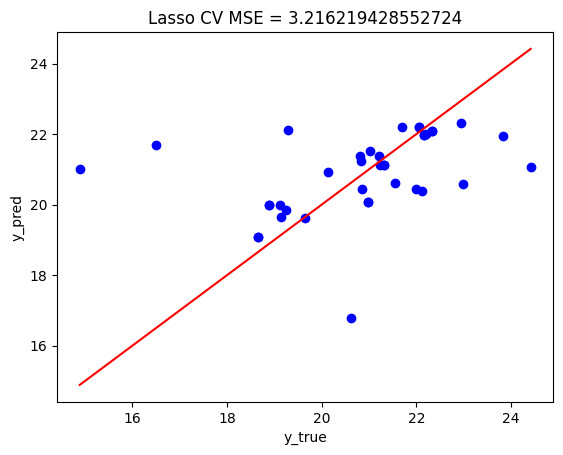

In [9]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [10]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 38 folds for each of 12 candidates, totalling 456 fits
[CV 1/38; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/38; 1/12] END max_depth=2, min_samples_leaf=1;, score=-7.468 total time=   0.0s
[CV 2/38; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/38; 1/12] END max_depth=2, min_samples_leaf=1;, score=-4.558 total time=   0.0s
[CV 3/38; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/38; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.318 total time=   0.0s
[CV 4/38; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/38; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1.025 total time=   0.0s
[CV 5/38; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/38; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.632 total time=   0.0s
[CV 6/38; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/38; 1/12] END m

[CV 16/38; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.013 total time=   0.0s
[CV 17/38; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 17/38; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.682 total time=   0.0s
[CV 18/38; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 18/38; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.062 total time=   0.0s
[CV 19/38; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 19/38; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.007 total time=   0.0s
[CV 20/38; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 20/38; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.000 total time=   0.0s
[CV 21/38; 6/12] START max_depth=5, min_samples_leaf=2..........................
[CV 21/38; 6/12] END max_depth=5, min_samples_leaf=2;, score=-0.030 total time=   0.0s
[CV 22/38; 6/12] START max_depth=5, min_samples_leaf=2...................

[CV 18/38; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 19/38; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 19/38; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 20/38; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 20/38; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.018 total time=   0.0s
[CV 21/38; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 21/38; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 22/38; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 22/38; 11/12] END max_depth=11, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 23/38; 11/12] START max_depth=11, min_samples_leaf=1........................
[CV 23/38; 11/12] END max_depth=11, min_samples_leaf=1;, score=-14.487 total time=   0.0s
[CV 24/38; 11/12] START max_depth=11, min_samples_leaf=1....

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x00000214C2E68890>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [11]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 2}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

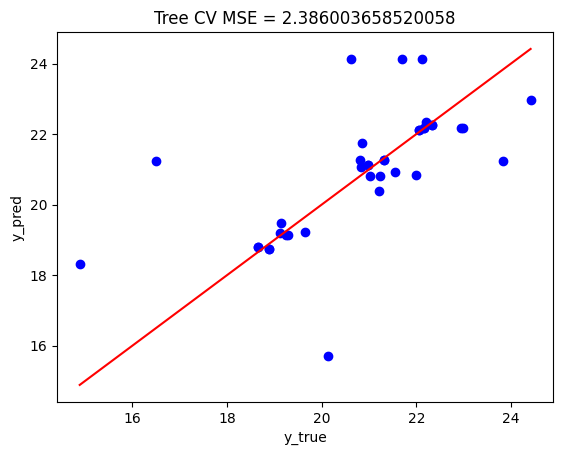

In [12]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# RF

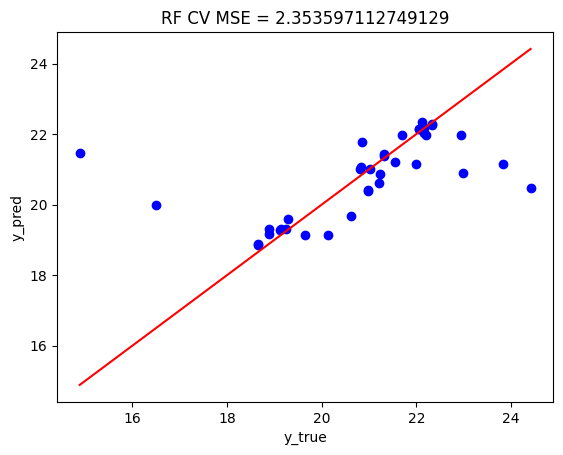

In [13]:
rf = RandomForestRegressor(random_state=42)
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# cb

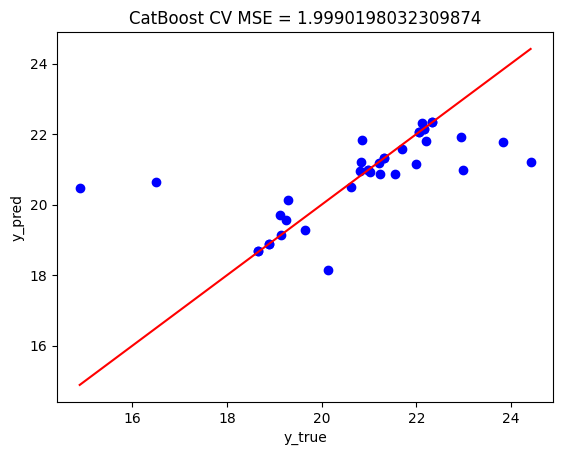

In [14]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')

In [20]:
cb.fit(X, y)

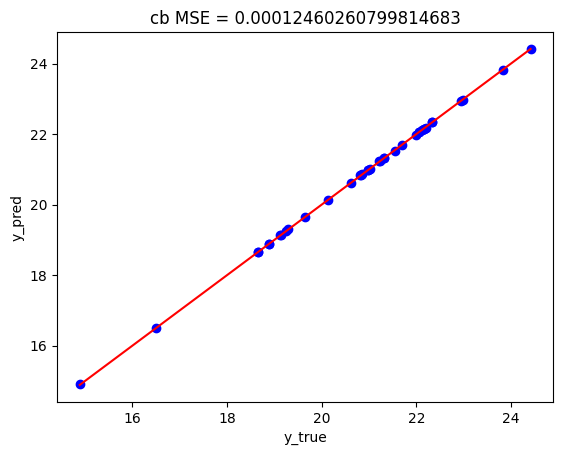

In [16]:
plot_result(cb, X, y, metric=mse ,title='cb')

In [21]:
dump(cb, 'cb_nd_fcc_a1#2.joblib')

['cb_nd_fcc_a1#2.joblib']

# GPR

In [17]:
steps = [('scaler', StandardScaler()), ('gpr', GaussianProcessRegressor(n_restarts_optimizer=5))]
pipeline = Pipeline(steps)

params = {
    'gpr__kernel': [Matern(), RationalQuadratic(), RBF(), DotProduct()]
}

grid = GridSearchCV(pipeline, params, cv=lo, scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 38 folds for each of 4 candidates, totalling 152 fits
[CV 1/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 1/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-108.670 total time=   0.0s
[CV 2/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 2/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.030 total time=   0.0s
[CV 3/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 3/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.374 total time=   0.0s
[CV 4/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 4/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.079 total time=   0.0s
[CV 5/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 5/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.292 total time=   0.0s
[CV 6/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 6/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.043 total time=   0.0s
[CV 7/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 7/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-470.998 total time=   0.0s
[CV 8/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................
[CV 8/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.430 total time=   0.0s
[CV 9/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5).................


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 9/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-1.019 total time=   0.0s
[CV 10/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 10/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.780 total time=   0.0s
[CV 11/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 11/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.340 total time=   0.0s
[CV 12/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 12/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.583 total time=   0.0s
[CV 13/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 13/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 14/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 14/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-96.192 total time=   0.0s
[CV 15/38; 1/

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 15/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-268.352 total time=   0.0s
[CV 16/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 16/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 17/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 17/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.658 total time=   0.0s
[CV 18/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 18/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 19/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 19/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 20/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 20/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.775 total time=   0.0s
[CV 21/38; 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 29/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.007 total time=   0.0s
[CV 30/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 30/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.020 total time=   0.0s
[CV 31/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 31/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 32/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 32/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 33/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 33/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 34/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 34/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 35/38; 1/

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 37/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 38/38; 1/4] START gpr__kernel=Matern(length_scale=1, nu=1.5)................
[CV 38/38; 1/4] END gpr__kernel=Matern(length_scale=1, nu=1.5);, score=-0.000 total time=   0.0s
[CV 1/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 1/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-25.204 total time=   0.0s
[CV 2/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 2/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-8.180 total time=   0.0s
[CV 3/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 3/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.172 total time=   0.1s
[CV 4/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 4/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.029 total time=   0.0s
[CV 5/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 5/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.009 total time=   0.0s
[CV 6/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 6/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.039 total time=   0.0s
[CV 7/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 7/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-104.035 total time=   0.0s
[CV 8/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 8/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.364 total time=   0.0s
[CV 9/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1).....
[CV 9/38; 2/4] END gpr__kernel=RationalQuadratic(alph

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 12/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.735 total time=   0.2s
[CV 13/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 13/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.1s
[CV 14/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 14/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.016 total time=   0.1s
[CV 15/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 15/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-5.580 total time=   0.0s
[CV 16/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 16/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.2s
[CV 17/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 17/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-3.182 total time=   0.0s
[CV 18/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 18/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 19/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 19/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 20/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 20/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.472 total time=   0.1s
[CV 21/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 21/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 22/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 22/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 23/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 23/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-8.045 total time=   0.0s
[CV 24/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 24/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-25.219 total time=   0.0s
[CV 25/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 25/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-17.955 total time=   0.0s
[CV 26/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 26/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.019 total time=   0.0s
[CV 27/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 27/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-4.771 total time=   0.0s
[CV 28/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 28/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.166 total time=   0.0s
[CV 29/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 29/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.037 total time=   0.1s
[CV 30/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 30/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.087 total time=   0.1s
[CV 31/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 31/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 32/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 32/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 33/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 33/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 34/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 34/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 35/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 35/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 36/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 36/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 37/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....
[CV 37/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.0s
[CV 38/38; 2/4] START gpr__kernel=RationalQuadratic(alpha=1, length_scale=1)....


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 38/38; 2/4] END gpr__kernel=RationalQuadratic(alpha=1, length_scale=1);, score=-0.000 total time=   0.1s
[CV 1/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 1/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-513.284 total time=   0.0s
[CV 2/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 2/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-22.556 total time=   0.0s
[CV 3/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 3/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.454 total time=   0.0s
[CV 4/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 4/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.112 total time=   0.0s
[CV 5/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 5/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.437 total time=   0.0s
[CV 6/38; 3/4] START gpr__kernel=RBF(length_scale=1)......

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

[CV 6/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.074 total time=   0.0s
[CV 7/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 7/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-470.998 total time=   0.0s
[CV 8/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 8/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-1.714 total time=   0.0s
[CV 9/38; 3/4] START gpr__kernel=RBF(length_scale=1)............................
[CV 9/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-5.638 total time=   0.0s
[CV 10/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 10/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-4.887 total time=   0.0s
[CV 11/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 11/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-1.376 total time=   0.0s
[CV 12/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 16/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 17/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 17/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.124 total time=   0.0s
[CV 18/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 18/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 19/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 19/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 20/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 20/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-6.288 total time=   0.0s
[CV 21/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 21/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 22/38; 3/4] START gpr__kernel=RBF(length_scale=1)..........................

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV 26/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.188 total time=   0.0s
[CV 27/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 27/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-10.807 total time=   0.0s
[CV 28/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 28/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.315 total time=   0.0s
[CV 29/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 29/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-1.191 total time=   0.0s
[CV 30/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 30/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.264 total time=   0.0s
[CV 31/38; 3/4] START gpr__kernel=RBF(length_scale=1)...........................
[CV 31/38; 3/4] END gpr__kernel=RBF(length_scale=1);, score=-0.000 total time=   0.0s
[CV 32/38; 3/4] START gpr__kernel=RBF(length_scale=1).........................

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

[CV 4/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.243 total time=   0.0s
[CV 5/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 5/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.969 total time=   0.0s
[CV 6/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 6/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.076 total time=   0.0s
[CV 7/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 7/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-452357.971 total time=   0.0s
[CV 8/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 8/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.154 total time=   0.0s
[CV 9/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)..........................
[CV 9/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-14.772 total time=   0.0s
[CV 10/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)............

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

[CV 13/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.004 total time=   0.0s
[CV 14/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 14/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-118.105 total time=   0.0s
[CV 15/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 15/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-991.202 total time=   0.0s
[CV 16/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 16/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.042 total time=   0.0s
[CV 17/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 17/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-4.585 total time=   0.0s
[CV 18/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 18/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.010 total time=   0.0s
[CV 19/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)........

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

[CV 22/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.000 total time=   0.0s
[CV 23/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 23/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-174.546 total time=   0.0s
[CV 24/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 24/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-174.548 total time=   0.0s
[CV 25/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 25/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-40.673 total time=   0.0s
[CV 26/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 26/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.262 total time=   0.0s
[CV 27/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 27/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-9.464 total time=   0.0s
[CV 28/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).......

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

[CV 31/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.001 total time=   0.0s
[CV 32/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 32/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.000 total time=   0.0s
[CV 33/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 33/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.042 total time=   0.0s
[CV 34/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 34/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.010 total time=   0.0s
[CV 35/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 35/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.035 total time=   0.0s
[CV 36/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1).........................
[CV 36/38; 4/4] END gpr__kernel=DotProduct(sigma_0=1);, score=-0.017 total time=   0.0s
[CV 37/38; 4/4] START gpr__kernel=DotProduct(sigma_0=1)............

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GridSearchCV(cv=LeaveOneOut(),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gpr',
                                        GaussianProcessRegressor(n_restarts_optimizer=5))]),
             param_grid={'gpr__kernel': [Matern(length_scale=1, nu=1.5),
                                         RationalQuadratic(alpha=1, length_scale=1),
                                         RBF(length_scale=1),
                                         DotProduct(sigma_0=1)]},
             scoring='neg_mean_squared_error', verbose=10)

In [18]:
grid.best_params_

{'gpr__kernel': RationalQuadratic(alpha=1, length_scale=1)}

In [ ]:
# Uncomment to get a model
# steps = [('scaler', StandardScaler()), ('gpr', GaussianProcessRegressor(kernel=RationalQuadratic(),n_restarts_optimizer=5))]
# pipeline = Pipeline(steps)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

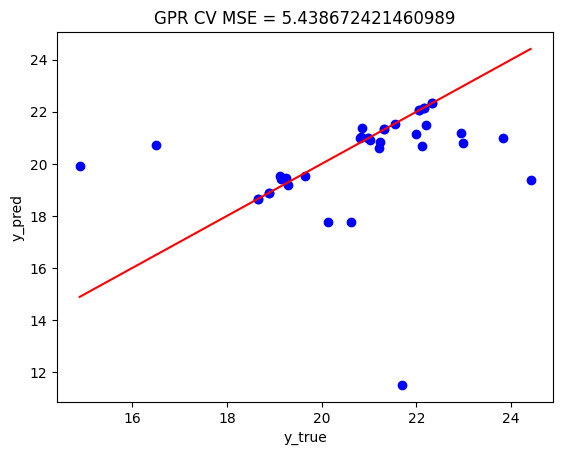

In [19]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='GPR')